<a href="https://colab.research.google.com/github/AliShujjat/DropOutRatesInPakistan/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Retrieving the data from Google Drive
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/Edu/Edu4.csv" "Edu4.csv"

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt
import math as math
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Edu4.csv')
data.head()

,Unnamed: 0,"If Drop-out, studied up-to which class",Edu status,Age of Child,Reasons for dropout,English Reading Level,Age of father (completed years),Reading in local language,Age of mother (completed years),Arithmetic Levels,Total number of surviving children (LESS THAN 17) of mother,Male members of household,Female members of household,Gender,Is bonus math question 1 attempted correctly?,Unique ID of government school,Name of the District,Total children present on day of visit,Year of school establishment,Local Language of the Village,Total number of enrolled children,Availability of Motorcycles/Bikes,Economic Profile,Total number of government schools in surveyed village,Is electricity available at school?,Type of Household,Currently Enrolled: Institution type,Name of Province/Territory,Current Class-Grade of Child
0,0,5,Never Enrolled,3.0,Poverty,Beginner,40.0,Story,36.0,Division,4.0,5.0,1.0,male,-1.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,Poor,2.0,0.0,pucca,Government,Azad Jammu and Kashmir,2
1,1,5,Currently Enrolled,5.0,Poverty,Words,35.0,Words,30.0,Division,2.0,2.0,2.0,female,-1.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,Rich,2.0,0.0,Semi pucca,Government,Azad Jammu and Kashmir,2
2,2,5,Currently Enrolled,5.0,Poverty,Small letters,70.0,Letters,65.0,Recognition of 10-99,3.0,6.0,3.0,female,0.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,Rich,2.0,0.0,Semi pucca,Government,Azad Jammu and Kashmir,Nursery
3,3,5,Currently Enrolled,10.0,Poverty,NaN,50.0,Story,45.0,Division,3.0,2.0,3.0,male,-1.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,1.0,Richest,2.0,0.0,Semi pucca,Government,Azad Jammu and Kashmir,3
4,4,5,Currently Enrolled,4.0,Poverty,Beginner,40.0,Story,30.0,Division,3.0,3.0,2.0,male,-1.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,Poor,2.0,0.0,pucca,Private,Azad Jammu and Kashmir,Nursery


In [4]:
data.shape

(260186, 29)

In [5]:
data.dtypes

Unnamed: 0                                                       int64
If Drop-out, studied up-to which class                          object
Edu status                                                      object
Age of Child                                                   float64
Reasons for dropout                                             object
English Reading Level                                           object
Age of father (completed years)                                float64
Reading in local language                                       object
Age of mother (completed years)                                float64
Arithmetic Levels                                               object
Total number of surviving children (LESS THAN 17) of mother    float64
Male members of household                                      float64
Female members of household                                    float64
Gender                                                          object
Is bon

In [7]:
data.isnull().sum(axis = 0)
#WE HAVE NULLS

Unnamed: 0                                                         0
If Drop-out, studied up-to which class                             0
Edu status                                                         0
Age of Child                                                       0
Reasons for dropout                                                0
English Reading Level                                          49360
Age of father (completed years)                                    0
Reading in local language                                          0
Age of mother (completed years)                                    0
Arithmetic Levels                                                  0
Total number of surviving children (LESS THAN 17) of mother        0
Male members of household                                          0
Female members of household                                        0
Gender                                                             0
Is bonus math question 1 attempted

In [12]:
#Replace with mode
data['English Reading Level'].fillna(data['English Reading Level'].mode()[0], inplace=True)
data.isnull().sum(axis = 0)

Unnamed: 0                                                     0
If Drop-out, studied up-to which class                         0
Edu status                                                     0
Age of Child                                                   0
Reasons for dropout                                            0
English Reading Level                                          0
Age of father (completed years)                                0
Reading in local language                                      0
Age of mother (completed years)                                0
Arithmetic Levels                                              0
Total number of surviving children (LESS THAN 17) of mother    0
Male members of household                                      0
Female members of household                                    0
Gender                                                         0
Is bonus math question 1 attempted correctly?                  0
Unique ID of government s

In [9]:
data.nunique()

Unnamed: 0                                                     260186
If Drop-out, studied up-to which class                             30
Edu status                                                          3
Age of Child                                                       14
Reasons for dropout                                                 7
English Reading Level                                               4
Age of father (completed years)                                    72
Reading in local language                                           5
Age of mother (completed years)                                    65
Arithmetic Levels                                                   6
Total number of surviving children (LESS THAN 17) of mother        16
Male members of household                                          28
Female members of household                                        21
Gender                                                              2
Is bonus math questi

In [10]:
data.describe(include='all')  

,Unnamed: 0,"If Drop-out, studied up-to which class",Edu status,Age of Child,Reasons for dropout,English Reading Level,Age of father (completed years),Reading in local language,Age of mother (completed years),Arithmetic Levels,Total number of surviving children (LESS THAN 17) of mother,Male members of household,Female members of household,Gender,Is bonus math question 1 attempted correctly?,Unique ID of government school,Name of the District,Total children present on day of visit,Year of school establishment,Local Language of the Village,Total number of enrolled children,Availability of Motorcycles/Bikes,Economic Profile,Total number of government schools in surveyed village,Is electricity available at school?,Type of Household,Currently Enrolled: Institution type,Name of Province/Territory,Current Class-Grade of Child
count,260186.000000,260186,260186,260186.000000,260186,210826,260186.000000,260186,260186.000000,260186,260186.000000,260186.000000,260186.000000,260186,260186.000000,260186.000000,260186,260186.000000,260186.000000,260186,260186.000000,260186.000000,260186,260186.000000,260186.000000,260186,260186,260186,260186
unique,NaN,30,3,NaN,7,4,NaN,5,NaN,6,NaN,NaN,NaN,2,NaN,NaN,154,NaN,NaN,295,NaN,NaN,4,NaN,NaN,3,4,8,18
top,NaN,5,Currently Enrolled,NaN,Poverty,Beginner,NaN,Story,NaN,Division,NaN,NaN,NaN,male,NaN,NaN,Panjgur,NaN,NaN,PASHTO,NaN,NaN,Poor,NaN,NaN,kutcha,Government,Balochistan,2
freq,NaN,251196,186805,NaN,253589,124465,NaN,132547,NaN,125860,NaN,NaN,NaN,146910,NaN,NaN,3808,NaN,NaN,128349,NaN,NaN,67392,NaN,NaN,98345,215730,67706,111843
mean,130092.500000,NaN,NaN,8.727061,NaN,NaN,40.869555,NaN,36.144401,NaN,3.519002,3.083075,3.084632,NaN,-0.737038,111052.476194,NaN,160.647079,1987.922709,NaN,189.815482,0.662545,NaN,1.138193,0.633877,NaN,NaN,NaN,NaN
std,75109.372907,NaN,NaN,3.779195,NaN,NaN,8.321908,NaN,7.396435,NaN,1.558213,1.251340,1.147668,NaN,0.440243,11889.175063,NaN,195.974294,11.284562,NaN,214.571726,0.514786,NaN,1.105592,0.481744,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,3.000000,NaN,NaN,20.000000,NaN,17.000000,NaN,0.000000,0.000000,0.000000,NaN,-1.000000,4792.000000,NaN,5.000000,1956.000000,NaN,10.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,65046.250000,NaN,NaN,6.000000,NaN,NaN,35.000000,NaN,30.000000,NaN,3.000000,3.000000,3.000000,NaN,-1.000000,105869.000000,NaN,46.000000,1983.000000,NaN,61.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,130092.500000,NaN,NaN,8.000000,NaN,NaN,40.000000,NaN,36.000000,NaN,3.000000,3.000000,3.000000,NaN,-1.000000,116946.000000,NaN,93.000000,1990.000000,NaN,119.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN
75%,195138.750000,NaN,NaN,12.000000,NaN,NaN,45.000000,NaN,40.000000,NaN,4.000000,3.000000,3.000000,NaN,0.000000,118083.000000,NaN,197.000000,1993.000000,NaN,233.000000,1.000000,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


In [11]:
#Replacing all values in dropout class-grade and class grade with numerics

data.replace({'If Drop-out, studied up-to which class':{'Kachi': 0.0, 'Nursery': 0.2, 'Prep': 0.4, 'PG': 0.6, 'KG': 0.8, 'ECE': 8}}, inplace = True)
data.replace({'Current Class-Grade of Child':{'Kachi': 0.0, 'Nursery': 0.2, 'Prep': 0.4, 'PG': 0.6, 'KG': 0.8, 'ECE': 8}}, inplace = True)

#Convert to float type
data['Current Class-Grade of Child'] = data['Current Class-Grade of Child'].astype(float)
data['If Drop-out, studied up-to which class'] = data['If Drop-out, studied up-to which class'].astype(float)

#Recheck uniques
display(data['If Drop-out, studied up-to which class'].value_counts())
display(data['Current Class-Grade of Child'].value_counts())

5.0     251654
3.0       2135
2.0       1966
4.0       1375
8.0        669
1.0        563
6.0        530
7.0        369
10.0       302
9.0        160
0.6        150
0.0         86
0.8         83
0.4         81
12.0        26
0.2         24
11.0        13
Name: If Drop-out, studied up-to which class, dtype: int64

2.0     111843
3.0      22712
1.0      20160
5.0      17264
4.0      17250
6.0      11346
8.0      11321
7.0       8963
9.0       6669
0.0       6554
0.8       6287
10.0      5976
0.2       4739
0.4       4366
0.6       3179
11.0      1068
12.0       489
Name: Current Class-Grade of Child, dtype: int64

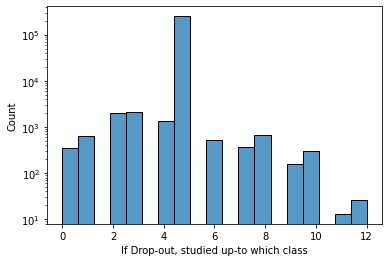

In [ ]:
ax = sns.histplot(data['If Drop-out, studied up-to which class'])
ax.set_yscale('log')

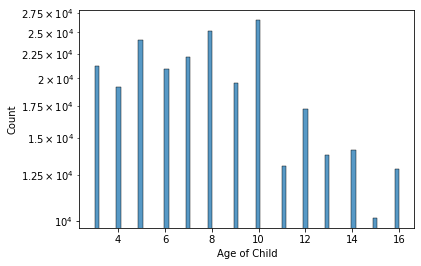

In [ ]:
ax = sns.histplot(data['Age of Child'])
ax.set_yscale('log')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


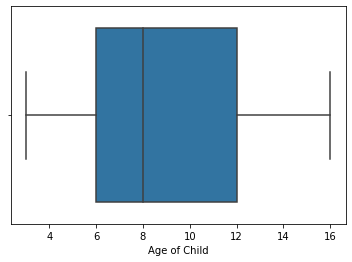

In [ ]:
sns.boxplot(data['Age of Child'])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


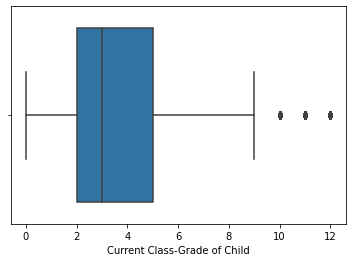

In [ ]:
data['Current Class-Grade of Child'].value_counts()

plt = data[data['Edu status'] == 'Currently Enrolled']
plt['Current Class-Grade of Child'].value_counts()
sns.boxplot(plt['Current Class-Grade of Child'])

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

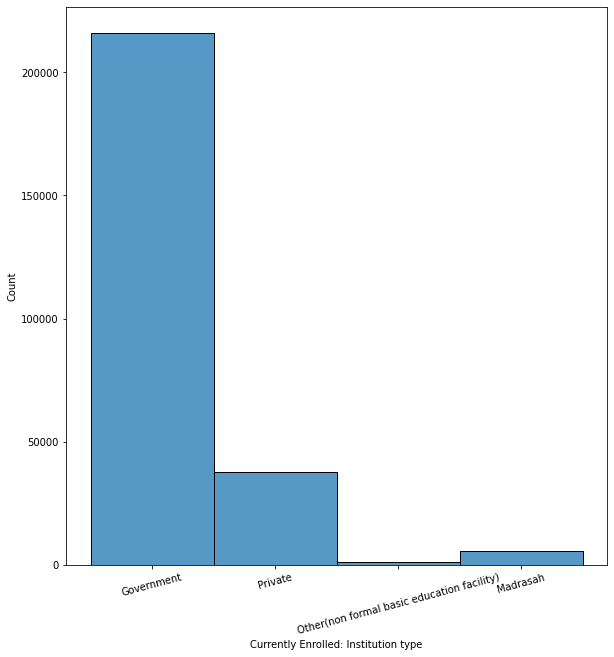

In [ ]:

plt = data[data['Edu status'] == 'Currently Enrolled']
#plt['Currently Enrolled: Institution type'].value_counts()

fig, ax = pyplt.subplots()
# the size of A4 paper
fig.set_size_inches(9.7, 10.27)
sns.histplot(data=data['Currently Enrolled: Institution type'], ax=ax)
pyplt.xticks(rotation=15)


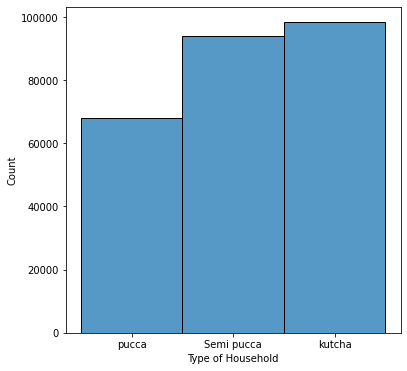

In [ ]:
#plt = data[data['Edu status'] == 'Currently Enrolled']
#plt['Currently Enrolled: Institution type'].value_counts()

fig, ax = pyplt.subplots()
# the size of A4 paper

#data.hist(column='Type of Household', bins=25, color='#86bf91')

fig.set_size_inches(6, 6)
sns.histplot(data=data['Type of Household'], ax=ax, binwidth=0.5)
#pyplt.xticks(rotation=15)

,Name of the District
Name of Province/Territory,
Azad Jammu and Kashmir,15848
Balochistan,67706
Gilgit-Baltistan,16828
Islamabad - ICT,1392
Khyber Pakhtunkhwa,42125
Khyber Pakhtunkhwa Merged Region,22312
Punjab,57450
Sindh,36525


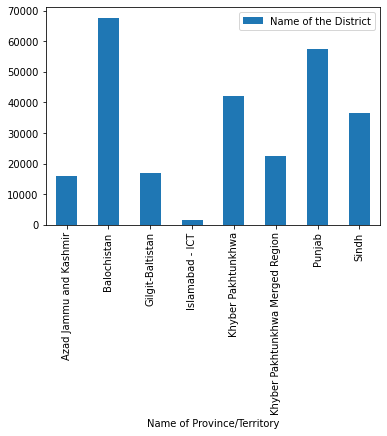

In [ ]:
distInfo = data[['Name of the District', 'Name of Province/Territory']].groupby(['Name of Province/Territory']).count()
display(distInfo)

distInfo.plot(kind = 'bar')

#Bar plot
#ax = data[["Category", "OrderQuantity"]].groupby(['Category']).sum().plot.bar(rot=0)

Text(0.5, 0.98, 'sf')

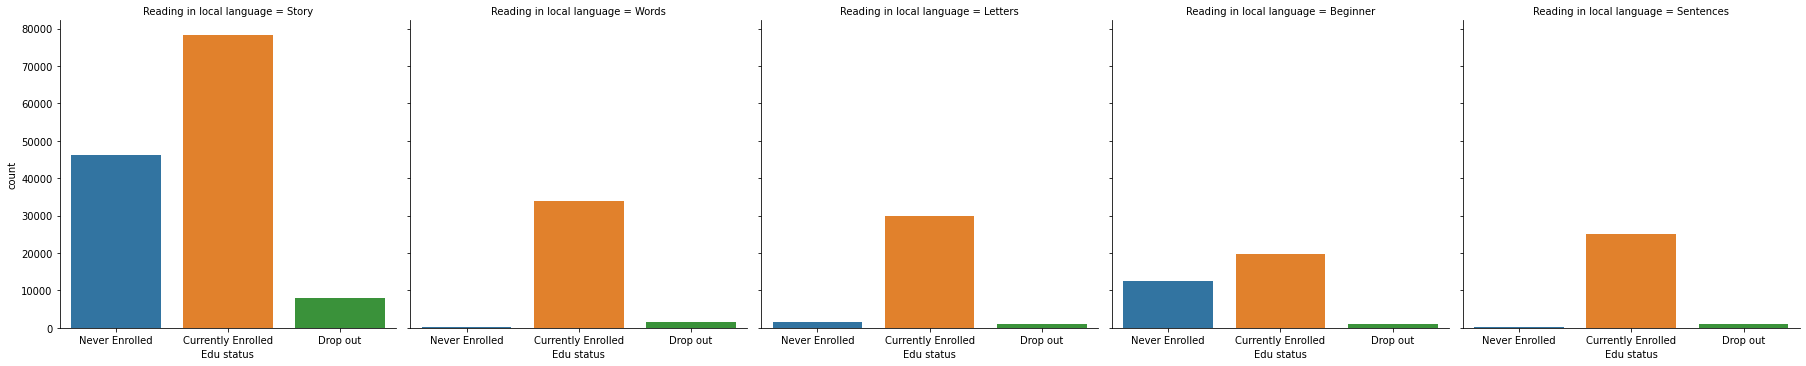

In [ ]:
g = sns.catplot('Edu status', col = 'Reading in local language',
                data=data[data['Reading in local language'].notnull()], kind="count", dodge = False)
fig.suptitle('sf')

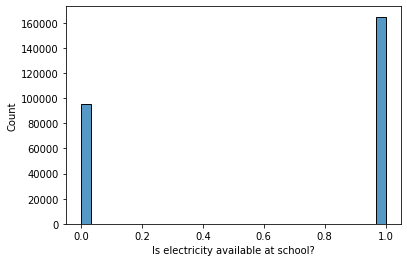

In [ ]:

sns.histplot(data['Is electricity available at school?'])

Text(0.5, 0.98, 'sf')

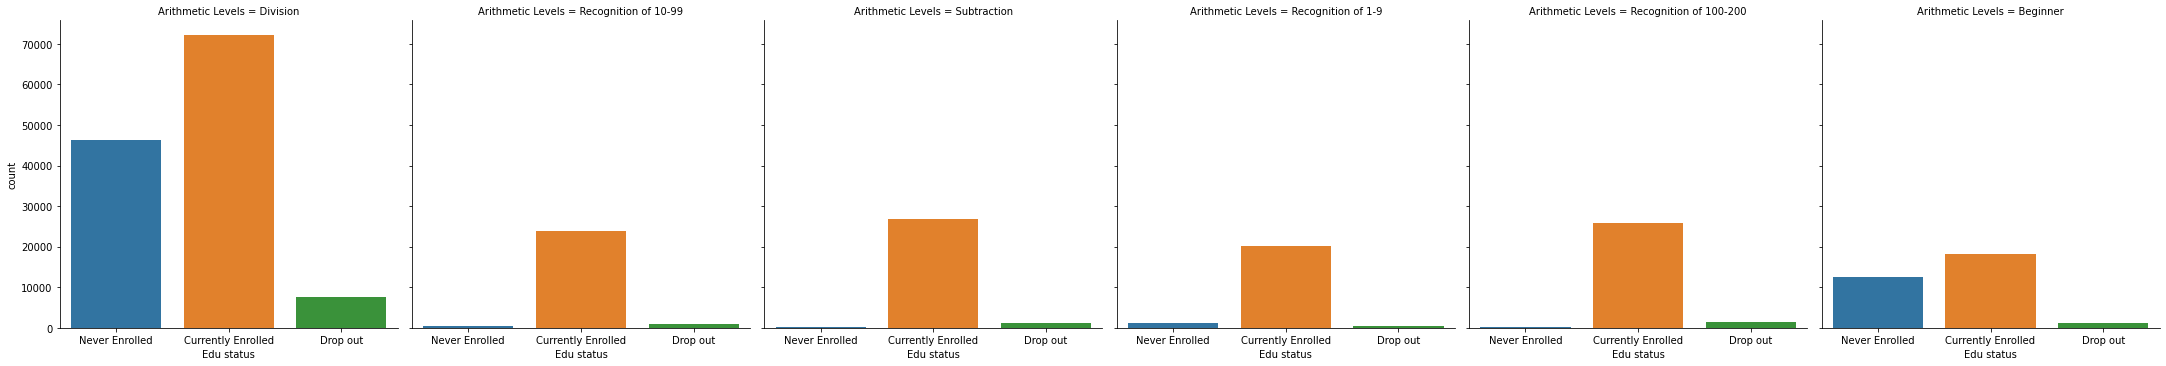

In [ ]:
g = sns.catplot('Edu status', col = 'Arithmetic Levels',
                data=data[data['Arithmetic Levels'].notnull()], kind="count", dodge = False)
fig.suptitle('sf')

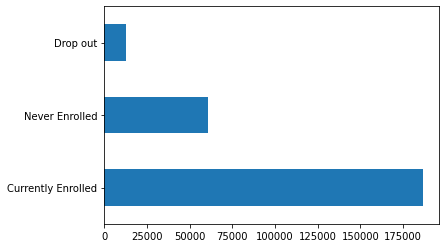

In [ ]:
data['Edu status'].value_counts().plot(kind='barh')

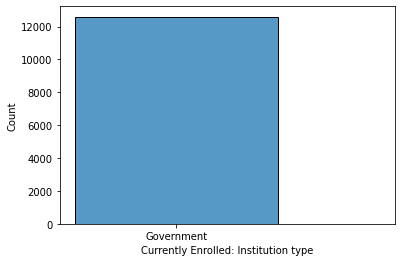

In [ ]:
plt = data[data['Edu status'] == 'Drop out']
#plt['Currently Enrolled: Institution type'].value_counts()
sns.histplot(plt['Currently Enrolled: Institution type'])

In [ ]:
plt = data[data['Edu status'] == 'Drop out']
#sns.boxplot(plt['Edu status'])
plt.plot(kind='pie', subplots = True)

TypeError: ignored